**Installing  Required Libraries**

In [78]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Importing Libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

**Loading the Dataset**

In [81]:
df = pd.read_csv('Loan_Data.csv')

In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


**Checking missing values in Dataset**

In [85]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling Missing Values**

**Filling categorical NaNs with mode**

In [86]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])

**Fill numeric NaNs with median**

In [87]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

**Again Checking Missing values they are filled or not**

In [88]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Exploratory Data Analysis (EDA)**

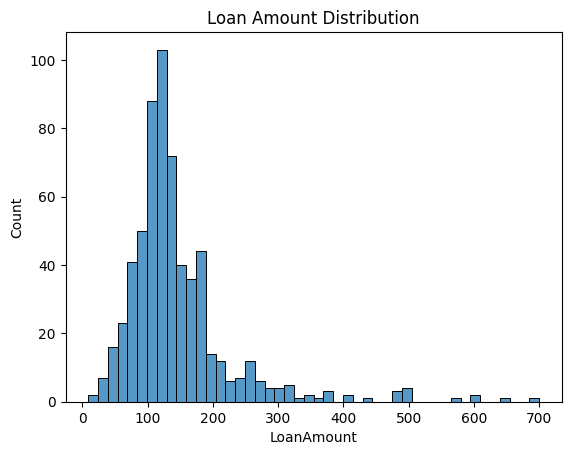

In [89]:
# Plotting loan amount distribution
sns.histplot(df['LoanAmount'])
plt.title('Loan Amount Distribution')
plt.show()

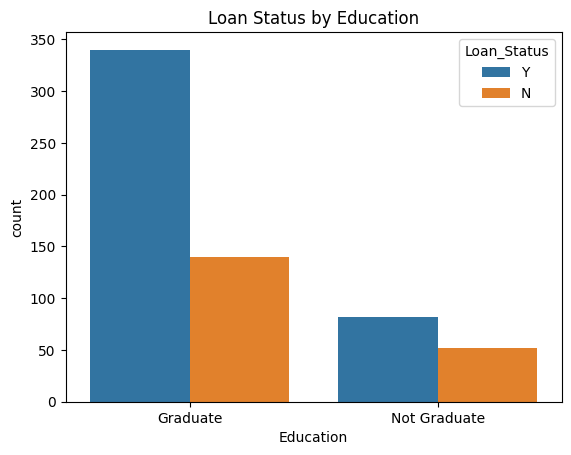

In [90]:
# Countplot for Education
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

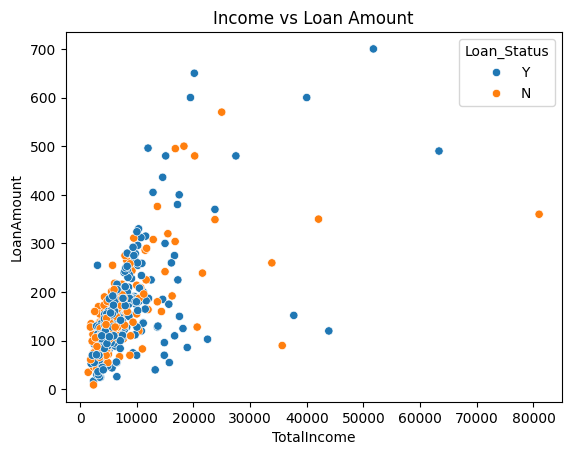

In [91]:
# Income vs Loan Amount
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.scatterplot(x='TotalIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Income vs Loan Amount')
plt.show()

**Data Preprocessing**


**Dropping Load_ID column because it will doesn't affect the model later**

In [92]:
df.drop(columns=['Loan_ID'], inplace=True)

**Machine learning models like Logistic Regression and Decision Tree cannot work with text(string) data directly,they need numerical input.So we convert categorical(object/string) columns into numbers using Label Encoding.**

In [93]:
# Creating a LabelEncoder object
le = LabelEncoder()
#loop through  which all columns with dtype = 'object' (i.e., strings)
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [94]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


**Train-Test Split**

In [95]:
# Features and target

# Drop the target column to get the input features
X = df.drop('Loan_Status', axis=1)     #x is input  #we dropped loan_status because it is Y(ouyput)

# Store the target column separately 
y = df['Loan_Status']      #(y is output)

**Random_state:** It ensures reproducibility means you'll get the same split every time you run the code.
You always get the same X_train, X_test, y_train, y_test split.

In [96]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a Logistic Regression Model**

In [97]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)   #max_iter: for maximum number of iterations.
log_model.fit(X_train, y_train)

E:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [98]:
# Predict and evaluate
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.7886178861788617


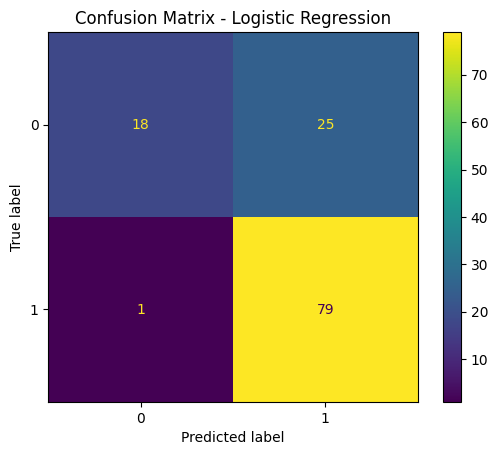

In [99]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Training a Decision Tree Model**

In [100]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", acc_tree)

Decision Tree Accuracy: 0.6910569105691057


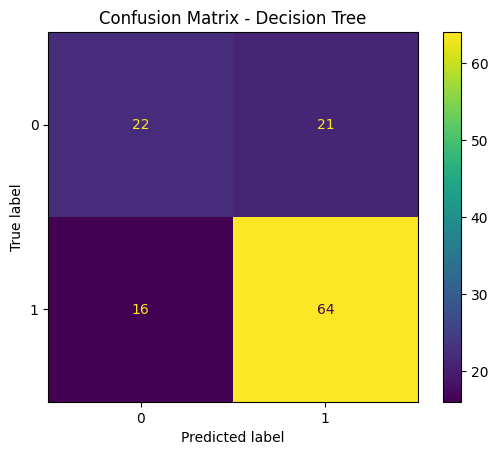

In [72]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm_tree).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

**Model Comparison Summary**
Logistic Regression Accuracy: 0.7886  , 
Decision Tree Accuracy: 0.6911

**Conclusion:**
Logistic Regression performed better than the Decision Tree on this dataset, making it the preferred model for predicting loan approvals.